# **Obtendo uma normal**

In [94]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [95]:
#dataset
df = pd.read_csv('/content/house_price.csv')
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


In [96]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

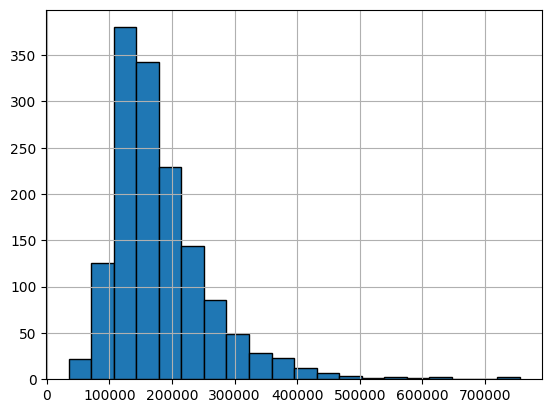

In [97]:
plt.hist(df['SalePrice'], bins=20, edgecolor='black')
plt.grid(True)
plt.show()

### **Teorema do limite central**

In [98]:
num_samples = 1000
sample_size = 30

sample_means = []

for _ in range(num_samples):
    sample = df['SalePrice'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

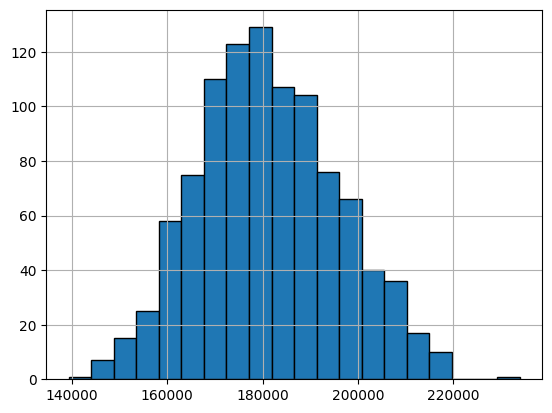

In [99]:
sample_means = np.array(sample_means)

plt.hist(sample_means, bins=20, edgecolor='black')
plt.grid(True)
plt.show()

In [100]:
from scipy.stats import skew
skew(sample_means)

0.19280923521656768

### **Log**

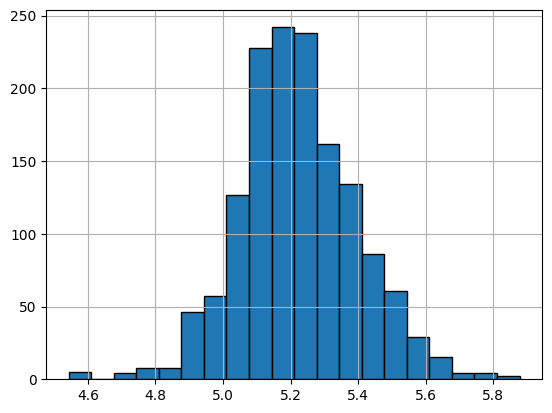

In [101]:
df['SalePrice_log'] = df['SalePrice'].apply(lambda x: np.log10(x))

plt.hist(df['SalePrice_log'], bins=20, edgecolor='black')
plt.grid(True)
plt.show()

In [102]:
from scipy.stats import skew
skew(df['SalePrice_log'])

0.12121036730137286

### **Box cox**

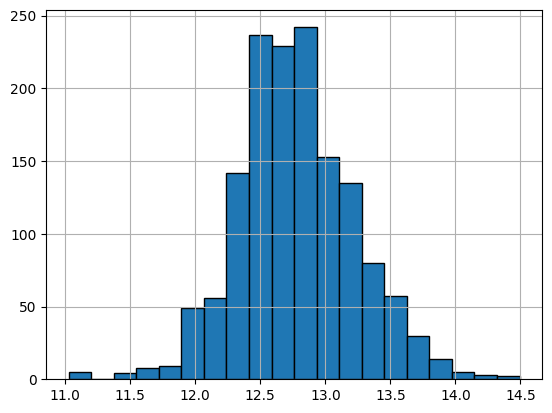

In [103]:
lbd = 0.01

df['SalePrice_boxcox'] = (df['SalePrice']**lbd - 1) / lbd

plt.hist(df['SalePrice_boxcox'], bins=20, edgecolor='black')
plt.grid(True)
plt.show()

In [104]:
skew(df['SalePrice_boxcox'])

0.1378887550654392